# CNN Gender

## Loading and preprocessing the data

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


2021-09-14 17:09:20.805294: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [3]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = X_train_.astype(np.float32) / 255.0, X_test_.astype(np.float32)/ 255.0

In [4]:
# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
# Reduce dimension size
np.random.seed(0) 

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28, 1)
(2000, 28, 28, 1)
(2000,)
(2000,)


In [6]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(
    shape=(28,28,1)))

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(
    rate=0.5))

model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(
    rate=0.5))

model.add(tf.keras.layers.Conv2D(
    filters=128, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(
    filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
)


2021-09-14 17:09:21.281878: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-14 17:09:21.282817: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.add(tf.keras.layers.GlobalAveragePooling2D())

In [8]:
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', 
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))
    
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`


In [11]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

2021-09-14 17:09:21.727150: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-14 17:09:21.744743: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1999965000 Hz


Epoch 1/20
57/57 [==============================] - 10s 150ms/step - loss: 2.3108 - accuracy: 0.1015 - val_loss: 2.2846 - val_accuracy: 0.1950
Epoch 2/20
57/57 [==============================] - 8s 145ms/step - loss: 2.0852 - accuracy: 0.2182 - val_loss: 1.2009 - val_accuracy: 0.5700
Epoch 3/20
57/57 [==============================] - 9s 151ms/step - loss: 1.0346 - accuracy: 0.6278 - val_loss: 0.4849 - val_accuracy: 0.8400
Epoch 4/20
57/57 [==============================] - 8s 131ms/step - loss: 0.6485 - accuracy: 0.8019 - val_loss: 0.3970 - val_accuracy: 0.8550
Epoch 5/20
57/57 [==============================] - 9s 154ms/step - loss: 0.4479 - accuracy: 0.8607 - val_loss: 0.3597 - val_accuracy: 0.8850
Epoch 6/20
57/57 [==============================] - 8s 140ms/step - loss: 0.3890 - accuracy: 0.8761 - val_loss: 0.2584 - val_accuracy: 0.9050
Epoch 7/20
57/57 [==============================] - 10s 167ms/step - loss: 0.2921 - accuracy: 0.9008 - val_loss: 0.1758 - val_accuracy: 0.9400
Epoc

In [18]:
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

63/63 [==============================] - 4s 61ms/step - loss: 0.2095 - accuracy: 0.9410

Test Acc. 94.10%


In [12]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(2000,)
(2000,)
Missclassification = 118


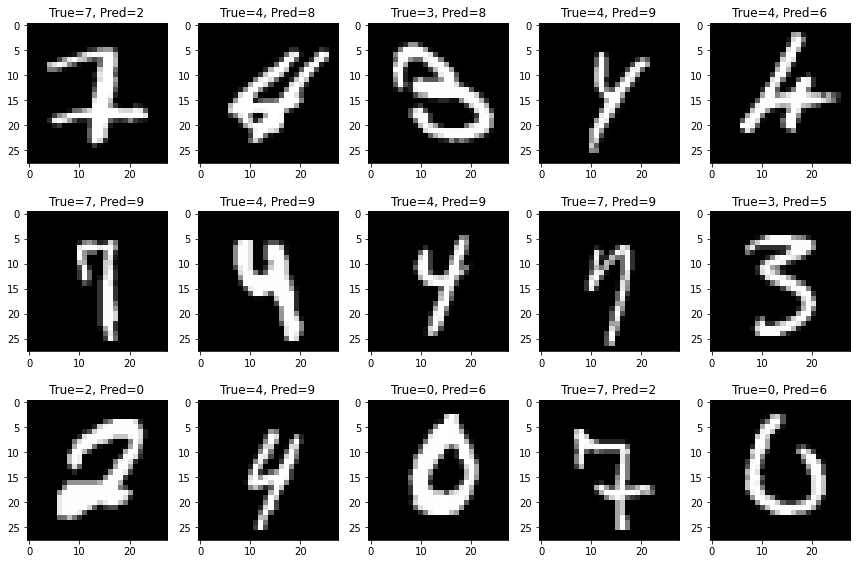

In [16]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()